<a href="https://colab.research.google.com/github/linh0941664362/Prediction-discount-of-Walmart-/blob/main/Walmart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
# Mount Google Drive
from google.colab import files
uploaded = files.upload()
# Đọc dữ liệu từ file CSV đã upload
data= pd.read_csv("walmart-products.csv")

# Xem nhanh 5 dòng đầu
data.head()


Saving walmart-products.csv to walmart-products (2).csv


,timestamp,url,final_price,sku,currency,gtin,specifications,image_urls,top_reviews,rating_stars,...,sizes,colors,seller,other_attributes,customer_reviews,ingredients,initial_price,discount,ingredients_full,categories
0,2024-08-24 00:00:00.000,https://www.walmart.com/ip/Laura-Mercier-Cavia...,22.90,173530386,USD,7.361501e+11,"[{""name"":""Brand"",""value"":""Laura Mercier""},{""na...","[""https://i5.walmartimages.com/seo/Laura-Merci...","{""negative"":{},""positive"":{}}","{""five_stars"":2,""four_stars"":3,""two_stars"":1}",...,[],"[""Sugar Frost"",""Tuxedo""]",Wal███t.c███,"[{""name"":""Instructions"",""value"":""Apply directl...","[{""name"":""Jac███"",""rating"":5,""review"":""My only...","Cyclopentasiloxane, trimethylsiloxysilicate, s...",NaN,NaN,"[{""type"":""Ingredients"",""values"":""Cyclopentasil...","[""Beauty"",""Makeup"",""Eye Makeup"",""Eye Shadow"",""..."
1,2024-08-24 00:00:00.000,https://www.walmart.com/ip/Exultantex-Grey-Bla...,47.88,430528189,USD,7.710779e+11,"[{""name"":""Brand"",""value"":""Exultantex""},{""name""...","[""https://i5.walmartimages.com/seo/Exultantex-...","{""negative"":{""rating"":1,""review"":""Color not ac...","{""five_stars"":47,""four_stars"":4,""one_star"":4,""...",...,"[""50\"" x 54\"""",""50\"" x 63\"""",""50\"" x 84\"""",""50...","[""Black"",""Blue"",""Green"",""Gray"",""Natural(Ivory)...",Exu███nte███ome███,"[{""name"":""Fabric Care Instructions"",""value"":""M...","[{""name"":""Dana"",""rating"":5,""review"":""I love th...",NaN,70.80,$22.92,NaN,"[""Home"",""Decor"",""Curtains & Window Treatments""..."
2,2024-08-24 00:00:00.000,https://www.walmart.com/ip/Jessica-London-Wome...,33.24,6013308220,USD,4.651920e+11,"[{""name"":""Features"",""value"":""Easy Care""},{""nam...","[""https://i5.walmartimages.com/seo/Jessica-Lon...","{""negative"":{},""positive"":{}}","{""five_stars"":2}",...,"[""S"",""M"",""L"",""1X"",""2X"",""3X""]","[""Aqua Sea"",""Dark Olive Green"",""Dark Sapphire""...",Ful███aut███ran███,"[{""name"":""Fabric Care Instructions"",""value"":""M...","[{""name"":""Bev███y F███"",""rating"":5,""review"":""V...",NaN,37.99,$4.75,NaN,"[""Clothing"",""Womens Plus"",""Plus Size Tops"",""Pl..."
3,2024-08-24 00:00:00.000,https://www.walmart.com/ip/100-Cotton-King-Per...,49.99,161657830,USD,8.407081e+11,"[{""name"":""Brand"",""value"":""Simply Put""},{""name""...","[""https://i5.walmartimages.com/asr/d88fe658-b9...","{""negative"":{""rating"":1,""review"":""[This review...","{""five_stars"":78,""four_stars"":17,""one_star"":2,...",...,"[""Queen"",""King""]","[""Beige"",""Blue"",""Gray"",""Spa Blue""]",IC ███bal███c,"[{""name"":""Fabric Care Instructions"",""value"":""M...","[{""name"":""Jes███oge███"",""rating"":5,""review"":""[...",NaN,71.99,$22.00,NaN,"[""Home"",""Bedding"",""Duvet Covers"",""King Duvet C..."
4,2024-08-25 00:00:00.000,https://www.walmart.com/ip/Disney-Boys-Graphic...,12.99,5397071399,USD,4.600086e+11,"[{""name"":""Country of Origin - Textiles"",""value...","[""https://i5.walmartimages.com/seo/Disney-Boys...","{""negative"":{""rating"":1,""review"":""This size sh...","{""five_stars"":12,""one_star"":1,""three_stars"":1,...",...,"[""2T"",""3T"",""3T-4T"",""3-4 Years"",""4-5 Years"",""4-...","[""1#Yellow Micky"",""2#Pink Minnie"",""3#Blue Dona...",Pat███,NaN,"[{""name"":""Mary"",""rating"":5,""review"":""Love thes...",NaN,29.00,$16.01,NaN,"[""Clothing"",""Kids Clothing"",""Boys Clothing"",""B..."


In [ ]:
import ast

# Xử lý cột discount về dạng số %
data['discount_value'] = data['discount'].str.extract(r'(\d+\.?\d*)').astype(float)
data['discount_pct'] = (data['discount_value'] / data['initial_price'].astype(float)) * 100

# Xử lý cột rating_stars thành điểm trung bình
def parse_rating_stars(row):
    try:
        stars = ast.literal_eval(row)
        total_reviews = sum(stars.values())
        weighted_sum = sum([k * v for k, v in zip([5, 4, 3, 2, 1], [
            stars.get('five_stars', 0),
            stars.get('four_stars', 0),
            stars.get('three_stars', 0),
            stars.get('two_stars', 0),
            stars.get('one_star', 0)
        ])])
        avg_rating = weighted_sum / total_reviews if total_reviews > 0 else None
        return avg_rating, total_reviews
    except:
        return None, None

data[['avg_rating', 'review_count']] = data['rating_stars'].apply(lambda x: pd.Series(parse_rating_stars(x)))

# Loại bỏ giá trị NaN cho các cột cần thiết
df = data.dropna(subset=['final_price', 'initial_price', 'discount_pct', 'avg_rating', 'review_count'])


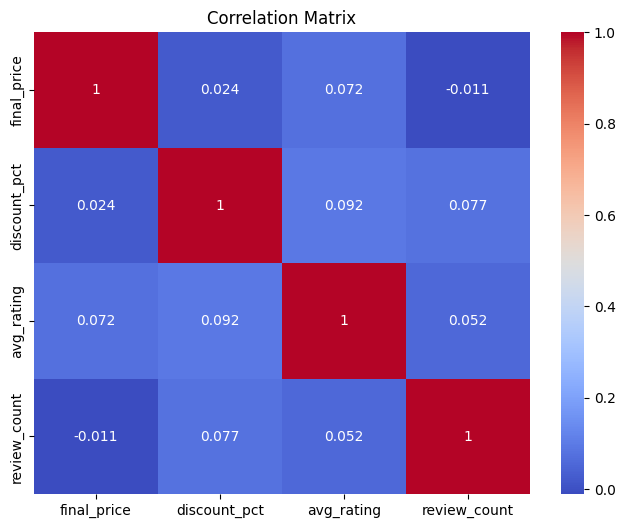

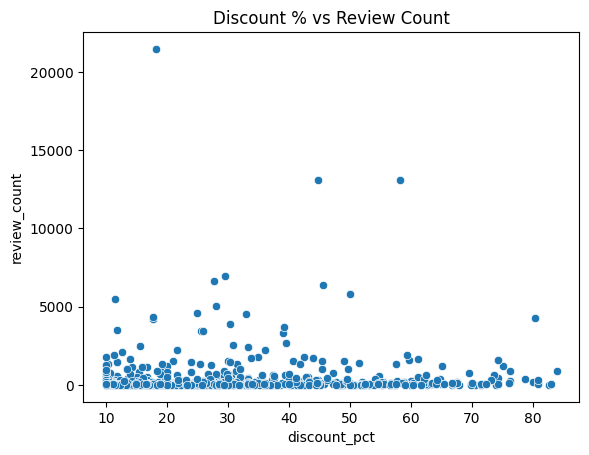

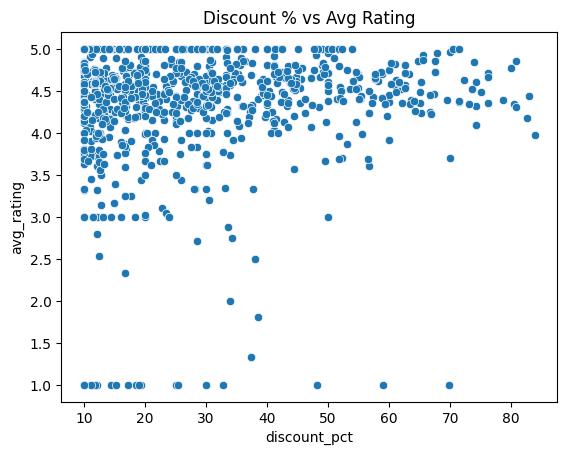

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ma trận tương quan
corr_matrix = df[['final_price', 'discount_pct', 'avg_rating', 'review_count']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Scatter Plot Discount vs Review Count
sns.scatterplot(data=df, x='discount_pct', y='review_count')
plt.title('Discount % vs Review Count')
plt.show()

# Scatter Plot Discount vs Avg Rating
sns.scatterplot(data=df, x='discount_pct', y='avg_rating')
plt.title('Discount % vs Avg Rating')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Target: Review Count (proxy cho doanh số tốt)
X = df[['final_price', 'avg_rating']]
y = df['discount_pct']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mô hình Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Dự đoán & Đánh giá
y_pred = model.predict(X_test)
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))


MAE: 13.724588313040174
R2 Score: -0.12161461540470109


In [ ]:
# Giả sử muốn đề xuất mức discount cho các sản phẩm final_price & rating đã có
df['predicted_discount'] = model.predict(df[['final_price', 'avg_rating']])

# Top 10 sản phẩm nên giảm giá nhiều nhất
df_recommend = df[['url', 'final_price', 'avg_rating', 'review_count', 'predicted_discount']].sort_values(by='predicted_discount', ascending=False).head(10)

import IPython
IPython.display.display(df_recommend)


<ipython-input-8-9eb0a59c07fb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['predicted_discount'] = model.predict(df[['final_price', 'avg_rating']])


,url,final_price,avg_rating,review_count,predicted_discount
261,https://www.walmart.com/ip/Asklazy-Women-s-Sum...,10.99,4.669014,142.0,71.650179
831,https://www.walmart.com/ip/Asklazy-Women-s-Sum...,10.99,4.669014,142.0,71.650179
735,https://www.walmart.com/ip/Pompeii-1-4-Ct-TDW-...,99.99,3.973510,906.0,68.922071
812,https://www.walmart.com/ip/PatPat-Toddler-Girl...,9.99,4.432432,37.0,68.911798
246,https://www.walmart.com/ip/Dpityserensio-39-3I...,0.91,4.181818,11.0,68.596784
200,https://www.walmart.com/ip/JeenMata-Pave-Accen...,24.00,4.342282,298.0,66.696138
557,https://www.walmart.com/ip/JeenMata-Pave-Accen...,24.00,4.342282,298.0,66.696138
620,https://www.walmart.com/ip/Anygrew-Womens-Summ...,12.98,4.727273,110.0,65.475867
481,https://www.walmart.com/ip/Anygrew-Womens-Summ...,12.98,4.727273,110.0,65.475867
909,https://www.walmart.com/ip/Fantaslook-Sweatshi...,17.99,4.098381,1606.0,65.227699


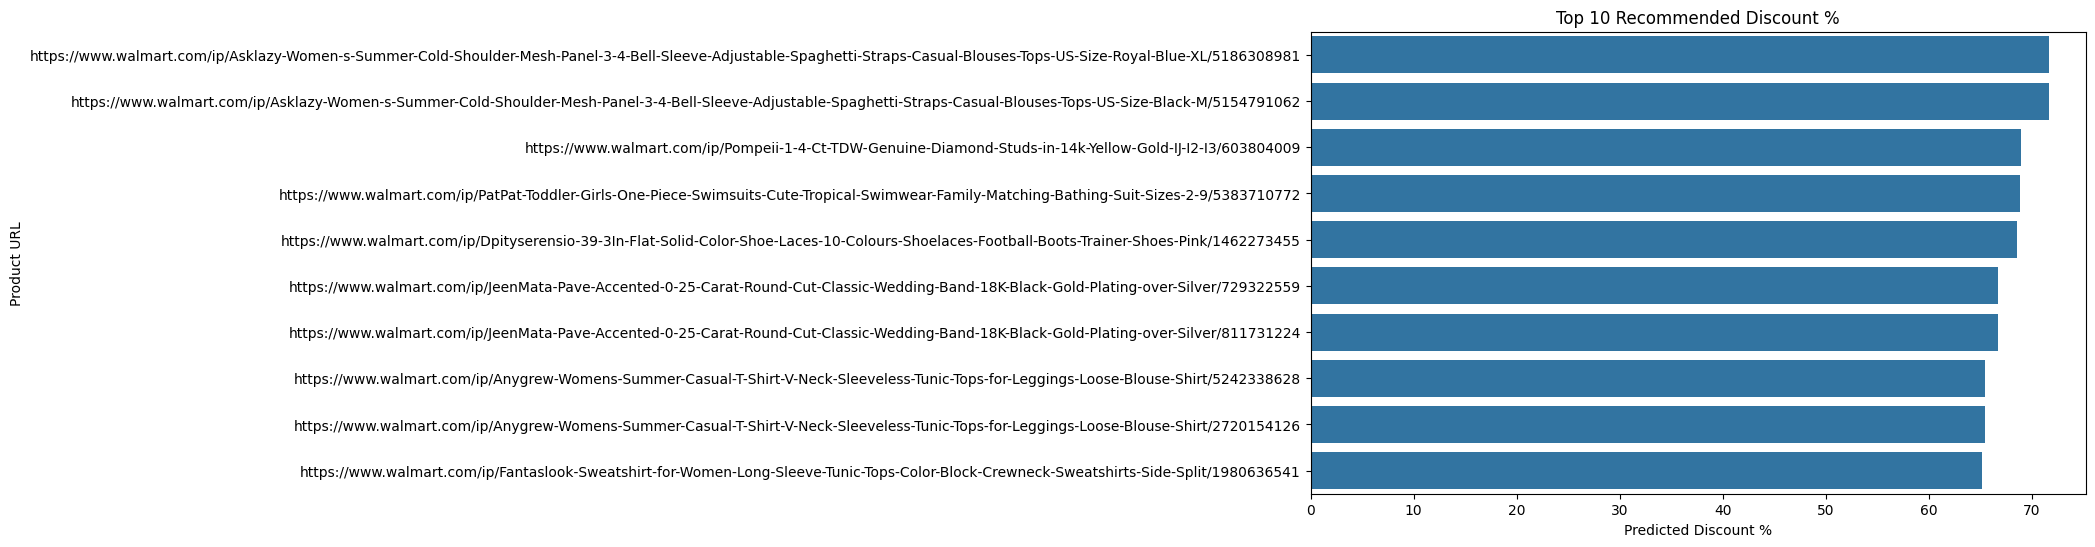

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=df_recommend, x='predicted_discount', y='url')
plt.title('Top 10 Recommended Discount %')
plt.xlabel('Predicted Discount %')
plt.ylabel('Product URL')
plt.show()


<ipython-input-10-1b414f212f26>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = kmeans.fit_predict(features_scaled)


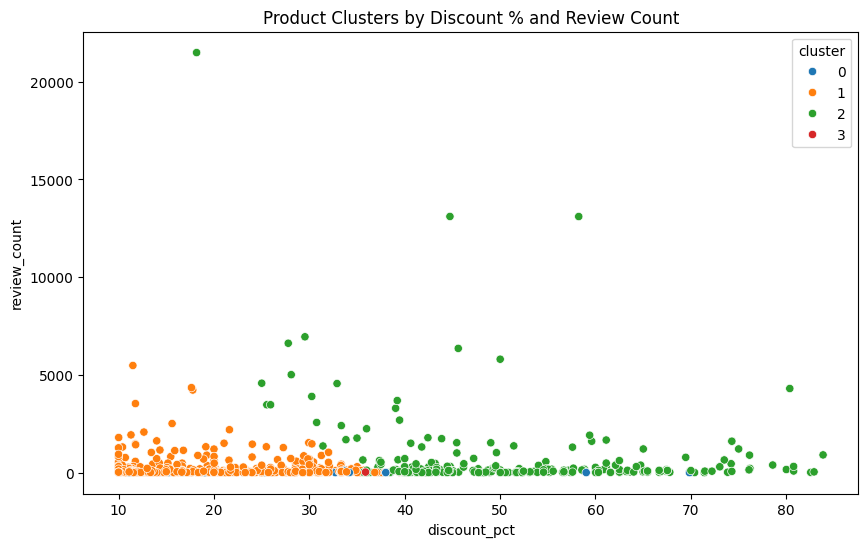

In [ ]:

# --- Data Cleaning ---
data['discount_value'] = data['discount'].str.extract(r'(\d+\.?\d*)').astype(float)
data['discount_pct'] = (data['discount_value'] / data['initial_price'].astype(float)) * 100

def parse_rating_stars(row):
    try:
        stars = ast.literal_eval(row)
        total_reviews = sum(stars.values())
        weighted_sum = sum([k * v for k, v in zip([5, 4, 3, 2, 1], [
            stars.get('five_stars', 0),
            stars.get('four_stars', 0),
            stars.get('three_stars', 0),
            stars.get('two_stars', 0),
            stars.get('one_star', 0)
        ])])
        avg_rating = weighted_sum / total_reviews if total_reviews > 0 else None
        return avg_rating, total_reviews
    except:
        return None, None

data[['avg_rating', 'review_count']] = data['rating_stars'].apply(lambda x: pd.Series(parse_rating_stars(x)))
df = data.dropna(subset=['final_price', 'initial_price', 'discount_pct', 'avg_rating', 'review_count'])

# --- Clustering ---
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

features = df[['final_price', 'discount_pct', 'avg_rating', 'review_count']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(features_scaled)

# --- Visualization ---
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='discount_pct', y='review_count', hue='cluster', palette='tab10')
plt.title('Product Clusters by Discount % and Review Count')
plt.show()


In [ ]:
# Hiển thị các cột quan trọng để xem sản phẩm thuộc cluster nào
df[['url', 'final_price', 'discount_pct', 'avg_rating', 'review_count', 'cluster']].head(20)


,url,final_price,discount_pct,avg_rating,review_count,cluster
1,https://www.walmart.com/ip/Exultantex-Grey-Bla...,47.88,32.372881,4.551724,58.0,1
2,https://www.walmart.com/ip/Jessica-London-Wome...,33.24,12.503290,5.000000,2.0,1
3,https://www.walmart.com/ip/100-Cotton-King-Per...,49.99,30.559800,4.663366,101.0,1
4,https://www.walmart.com/ip/Disney-Boys-Graphic...,12.99,55.206897,4.400000,15.0,2
5,https://www.walmart.com/ip/Women-s-Vanity-Fair...,28.00,30.000000,4.431579,95.0,1
6,https://www.walmart.com/ip/IBTOM-CASTLE-Women-...,19.99,37.511722,4.333333,12.0,2
7,https://www.walmart.com/ip/a-Jesdani-Women-s-C...,22.99,11.542901,4.196429,336.0,1
8,https://www.walmart.com/ip/4th-of-July-Women-s...,6.09,49.165275,4.719212,203.0,2
9,https://www.walmart.com/ip/Vulcanodon-Mens-Paj...,24.99,34.219531,4.647059,68.0,1
10,https://www.walmart.com/ip/GrandeLash-MD-Serum...,36.98,45.617647,4.635463,6356.0,2


In [ ]:
# Sản phẩm thuộc nhóm 0
group_0 = df[df['cluster'] == 0][['url', 'final_price', 'discount_pct', 'avg_rating', 'review_count']]
group_0.head(10)




,url,final_price,discount_pct,avg_rating,review_count
29,https://www.walmart.com/ip/FY24-Valentine-s-Da...,0.99,37.341772,1.333333,3.0
55,https://www.walmart.com/ip/Ruimatai-Women-s-Pl...,6.36,38.550725,1.812500,16.0
175,https://www.walmart.com/ip/Women-s-Summer-Wide...,21.99,14.369159,1.000000,1.0
198,https://www.walmart.com/ip/Abcnature-Women-Leg...,4.39,18.552876,1.000000,1.0
256,https://www.walmart.com/ip/New-York-Company-Me...,10.40,69.855072,1.000000,1.0
286,https://www.walmart.com/ip/LovelyDaisy-Plus-Si...,14.99,48.238950,1.000000,5.0
295,https://www.walmart.com/ip/LovelyDaisy-Plus-Si...,14.99,48.238950,1.000000,5.0
315,https://www.walmart.com/ip/CHEF-CODE-The-Profe...,13.99,30.015008,1.000000,1.0
326,https://www.walmart.com/ip/Gubotare-Golf-Shirt...,10.30,19.278997,1.000000,3.0
350,https://www.walmart.com/ip/CHAMPRO-Bootleg-2-I...,27.95,32.731649,1.000000,1.0


In [ ]:
# Nhóm 1
group_1 = df[df['cluster'] == 1][['url', 'final_price', 'discount_pct', 'avg_rating', 'review_count']]
group_1.head(10)



,url,final_price,discount_pct,avg_rating,review_count
1,https://www.walmart.com/ip/Exultantex-Grey-Bla...,47.88,32.372881,4.551724,58.0
2,https://www.walmart.com/ip/Jessica-London-Wome...,33.24,12.503290,5.000000,2.0
3,https://www.walmart.com/ip/100-Cotton-King-Per...,49.99,30.559800,4.663366,101.0
5,https://www.walmart.com/ip/Women-s-Vanity-Fair...,28.00,30.000000,4.431579,95.0
7,https://www.walmart.com/ip/a-Jesdani-Women-s-C...,22.99,11.542901,4.196429,336.0
9,https://www.walmart.com/ip/Vulcanodon-Mens-Paj...,24.99,34.219531,4.647059,68.0
11,https://www.walmart.com/ip/nuLOOM-Vintage-Erli...,46.49,17.277580,4.673469,49.0
12,https://www.walmart.com/ip/Georgia-Giant-Work-...,123.00,31.104016,4.512397,242.0
13,https://www.walmart.com/ip/Amay-800-Thread-Cou...,49.50,10.000000,5.000000,8.0
14,https://www.walmart.com/ip/Hard-Tail-Women-s-F...,44.88,25.050100,4.181818,11.0


In [ ]:
# Nhóm 2
group_2 = df[df['cluster'] == 2][['url', 'final_price', 'discount_pct', 'avg_rating', 'review_count']]
group_2.head(10)



,url,final_price,discount_pct,avg_rating,review_count
4,https://www.walmart.com/ip/Disney-Boys-Graphic...,12.99,55.206897,4.400000,15.0
6,https://www.walmart.com/ip/IBTOM-CASTLE-Women-...,19.99,37.511722,4.333333,12.0
8,https://www.walmart.com/ip/4th-of-July-Women-s...,6.09,49.165275,4.719212,203.0
10,https://www.walmart.com/ip/GrandeLash-MD-Serum...,36.98,45.617647,4.635463,6356.0
17,https://www.walmart.com/ip/Jockey-Women-s-Rib-...,19.99,41.205882,4.034884,86.0
20,https://www.walmart.com/ip/SONGMICS-3-Tier-Sho...,15.99,60.015004,4.362069,58.0
21,https://www.walmart.com/ip/MOSHU-Summer-Womens...,13.99,61.128091,4.541092,1667.0
25,https://www.walmart.com/ip/Exclusivo-Mezcla-Wa...,25.99,53.572705,4.515625,64.0
30,https://www.walmart.com/ip/Rest-Haven-Upholste...,44.00,67.407407,4.459459,74.0
32,https://www.walmart.com/ip/AUSTUFF-Swivel-Bar-...,239.99,57.372245,4.428571,14.0


In [ ]:

# Nhóm 3
group_3 = df[df['cluster'] == 3][['url', 'final_price', 'discount_pct', 'avg_rating', 'review_count']]
group_3.head(10)

,url,final_price,discount_pct,avg_rating,review_count
372,https://www.walmart.com/ip/WestinTrends-Malibu...,1471.99,39.424031,4.6,25.0
660,https://www.walmart.com/ip/WestinTrends-Malibu...,1685.99,35.893673,4.6,25.0
926,https://www.walmart.com/ip/WestinTrends-Malibu...,1685.99,35.893673,4.6,25.0


| Cluster | Ý Nghĩa                       |
| ------- | ------------------------------------------------------------ |
| 0       | Có thể là nhóm sản phẩm giá thấp, discount nhiều, review cao |
| 1       | Nhóm sản phẩm luxury (giá cao, ít discount, rating cao)      |
| 2       | Sản phẩm khó bán (review ít, rating thấp)                    |
| 3       | Sản phẩm phổ biến, discount nhẹ nhưng vẫn bán tốt            |
